# Analise dos dados utilizando TF-IDF

### Setup inicial

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Baixar stop words do NLTK
nltk.download('stopwords')

# Baixar tokenizador
nltk.download('punkt')

stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luizk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luizk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Carregar os dados do .CSV

Esses dados já foram pré-processados, passando por remoção de stopwords, pontuações e etc.

In [3]:
import csv

# Criação de listas para armazenar os dados que entrarão no DataFrame
nomes = []
documents = []
processed_documents = []

# Etapa 2: Iterar pelos arquivos e ler o conteúdo
with open("DadosMinerados.csv", "r", encoding='utf-8') as infile:
    reader = csv.reader(infile, delimiter=',')

    # Pular os headers
    next(reader, None)  # skip the headers

    for row in reader:
        nomes.append(row[0])
        documents.append(row[1])
        processed_documents.append(row[2].replace("'", "").replace(",", "").replace("[", "").replace("]", "").split(" "))

# Etapa 3: Criar o DataFrame
df_documents = pd.DataFrame({
    'documento': nomes,
    'texto_bruto': documents,
    'texto_processado': processed_documents,
})

# Visualizar o DataFrame
df_documents

,documento,texto_bruto,texto_processado
0,acid-splash,\nAcid Splash\n\n\n\n\n\n\n\nSource: Player's ...,"[acid, splash, source, players, handbook, conj..."
1,blade-ward,\nBlade Ward\n\n\n\n\n\n\n\nSource: Player's H...,"[blade, ward, source, players, handbook, abjur..."
2,booming-blade,\nBooming Blade\n\n\n\n\n\n\n\nSource: Tasha's...,"[booming, blade, source, tashas, cauldron, eve..."
3,chill-touch,\nChill Touch\n\n\n\n\n\n\n\nSource: Player's ...,"[chill, touch, source, players, handbook, necr..."
4,control-flames,\nControl Flames\n\n\n\n\n\n\n\nSource: Xanath...,"[control, flames, source, xanathars, guide, ev..."
...,...,...,...
575,time-stop,\nTime Stop\n\n\n\n\n\n\n\nSource: Player's Ha...,"[time, stop, source, players, handbook, 9thlev..."
576,true-polymorph,\nTrue Polymorph\n\n\n\n\n\n\n\nSource: Player...,"[true, polymorph, source, players, handbook, 9..."
577,true-resurrection,\nTrue Resurrection\n\n\n\n\n\n\n\nSource: Pla...,"[true, resurrection, source, players, handbook..."
578,weird,\nWeird\n\n\n\n\n\n\n\nSource: Player's Handbo...,"[weird, source, players, handbook, 9thlevel, i..."


## Vetorização com TF-IDF

### Vetorização com TF-IDF

Aqui utilizamos o modelo **TF-IDF (Term Frequency - Inverse Document Frequency)** para converter os documentos em vetores numéricos, representando a importância de cada termo em relação ao corpus.

- **TF-IDF**: O modelo TF-IDF calcula a relevância de uma palavra em um documento, levando em conta a frequência da palavra no documento (TF) e a frequência inversa nos outros documentos do corpus (IDF), penalizando termos muito comuns.
- **Vetorização**: Os documentos são transformados em vetores numéricos, onde cada termo é representado por uma dimensão no vetor.
- **DataFrame**: A matriz TF-IDF resultante é convertida para um DataFrame, permitindo uma visualização clara dos pesos atribuídos a cada termo nos diferentes documentos.

Isso fornece a base para cálculos de similaridade e outras análises quantitativas sobre o conteúdo textual.


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Juntando os documentos processados novamente como strings
processed_docs_str = [' '.join(doc) for doc in processed_documents]

# Vetorização com TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_docs_str)

# Convertendo a matriz TF-IDF para um dataframe para visualização
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df

,0104,0105,01100,0133,0143,0150,0513,0613,10,100,...,younger,your,youre,yugoloth,zephyr,ziggurat,zinc,zombie,zombies,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048987,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Cálculo da Similaridade por Cosseno

Essa métrica nos ajuda a entender quais documentos possuem conteúdo mais semelhante no corpus.

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculando a similaridade por cosseno entre os documentos
cosine_sim = cosine_similarity(tfidf_matrix)

# Convertendo para um DataFrame para melhor visualização
cosine_sim_df = pd.DataFrame(cosine_sim, index=[f"Doc{i+1}" for i in range(len(documents))],
                             columns=[f"Doc{i+1}" for i in range(len(documents))])

# Exibindo a matriz de similaridade por cosseno
cosine_sim_df

,Doc1,Doc2,Doc3,Doc4,Doc5,Doc6,Doc7,Doc8,Doc9,Doc10,...,Doc571,Doc572,Doc573,Doc574,Doc575,Doc576,Doc577,Doc578,Doc579,Doc580
Doc1,1.000000,0.075826,0.181883,0.218887,0.088079,0.229599,0.089871,0.050695,0.047901,0.180177,...,0.115462,0.064364,0.041472,0.115401,0.092521,0.071733,0.077794,0.056036,0.099094,0.075566
Doc2,0.075826,1.000000,0.162968,0.185924,0.033638,0.063357,0.065927,0.038759,0.050482,0.044130,...,0.056806,0.035497,0.014907,0.066964,0.037336,0.048497,0.029547,0.018896,0.045699,0.046115
Doc3,0.181883,0.162968,1.000000,0.391993,0.050336,0.226965,0.048082,0.022494,0.045049,0.168201,...,0.125904,0.045761,0.053670,0.102326,0.126458,0.058111,0.093259,0.037735,0.064776,0.056332
Doc4,0.218887,0.185924,0.391993,1.000000,0.036051,0.261015,0.066543,0.075178,0.062747,0.203374,...,0.105059,0.083363,0.072202,0.082920,0.144986,0.046918,0.116208,0.091412,0.074083,0.089791
Doc5,0.088079,0.033638,0.050336,0.036051,1.000000,0.078010,0.136559,0.017384,0.103227,0.038832,...,0.047318,0.039461,0.108385,0.037958,0.050775,0.078565,0.116651,0.052662,0.024651,0.063294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc576,0.071733,0.048497,0.058111,0.046918,0.078565,0.064969,0.049486,0.017700,0.065648,0.030962,...,0.066206,0.072513,0.105730,0.036960,0.077235,1.000000,0.142185,0.050208,0.084673,0.103608
Doc577,0.077794,0.029547,0.093259,0.116208,0.116651,0.057436,0.124048,0.015795,0.019144,0.051143,...,0.075903,0.109132,0.581593,0.088554,0.104484,0.142185,1.000000,0.167138,0.109931,0.111182
Doc578,0.056036,0.018896,0.037735,0.091412,0.052662,0.047309,0.044093,0.065357,0.019585,0.030783,...,0.027250,0.076812,0.146708,0.043952,0.137255,0.050208,0.167138,1.000000,0.069180,0.079060
Doc579,0.099094,0.045699,0.064776,0.074083,0.024651,0.096578,0.045305,0.021610,0.033777,0.040609,...,0.163118,0.136090,0.050006,0.090614,0.105303,0.084673,0.109931,0.069180,1.000000,0.053336


### Visualização da Similaridade entre Documentos: Heatmap

O heatmap oferece uma visão intuitiva e imediata das relações entre os documentos, permitindo identificar rapidamente grupos de documentos similares.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o tamanho da figura
plt.figure(figsize=(10, 8))

# Gerando o heatmap da matriz de similaridade por cosseno
sns.heatmap(cosine_sim_df, annot=True, cmap='Blues', linewidths=0.5)

# Definindo o título do heatmap
plt.title('Heatmap da Similaridade por Cosseno entre Documentos')

# Exibindo o gráfico
plt.show()

### Sistema de Recomendação de Documentos com Base em Similaridade

Nesta seção, implementamos um **sistema de recomendação de documentos** utilizando a similaridade por cosseno entre uma consulta fornecida pelo usuário e os documentos existentes.

- **Entrada do usuário**: O usuário insere um termo ou frase de busca.
- **Pré-processamento da consulta**: A consulta é processada da mesma forma que os documentos, incluindo tokenização, normalização e remoção de stopwords.
- **Vetor TF-IDF da consulta**: A consulta é transformada em um vetor TF-IDF usando o mesmo modelo que foi treinado com os documentos.
- **Cálculo da similaridade**: A similaridade por cosseno é calculada entre o vetor da consulta e os vetores TF-IDF dos documentos. Isso permite identificar quais documentos são mais relevantes para a consulta.
- **Ranqueamento das recomendações**: Os documentos são classificados em ordem decrescente de similaridade, e os mais relevantes são retornados ao usuário em um DataFrame.

Esse sistema de recomendação ajusta os resultados com base nos termos fornecidos, facilitando a recuperação dos documentos mais similares à consulta.


In [ ]:
# Função para tokenizar, normalizar e remover stopwords e pontuação
def preprocess_document(doc):
    # Tokenização e normalização (lower case)
    tokens = word_tokenize(doc.lower())
    # Remoção de stopwords e pontuação
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

def recomendar_documentos_ajustada(consulta, df, tfidf_matrix, vectorizer):
    # Preprocessar a consulta da mesma maneira que os documentos
    consulta_processada = ' '.join(preprocess_document(consulta))

    # Vetorizar a consulta usando o mesmo modelo TF-IDF
    consulta_tfidf = vectorizer.transform([consulta_processada])

    # Calcular a similaridade por cosseno entre a consulta e os documentos
    similaridade = cosine_similarity(consulta_tfidf, tfidf_matrix)[0]

    # Obter os índices dos documentos ordenados pela similaridade
    indices_ranqueados = similaridade.argsort()[::-1]

    # Exibir os documentos mais similares com base no termo de busca e suas similaridades
    recomendacoes = pd.DataFrame({
        'Processed Document': df.loc[indices_ranqueados, 'Processed Document'],
        'Similaridade': similaridade[indices_ranqueados]
    })

    return recomendacoes

# Entrada pelo usuário
termo_busca = input("Digite os termos de busca: ")

# Obter as recomendações ajustadas com valores de similaridade
recomendacoes_df_ajustada = recomendar_documentos_ajustada(termo_busca, df_documents, tfidf_matrix, vectorizer)

recomendacoes_df_ajustada

## Clusterização de Documentos com K-Means

In [10]:
from sklearn.cluster import KMeans

# Definindo o número de clusters (podemos testar com 3 inicialmente)
num_clusters = 3

# Aplicando o KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Adicionando as labels de clusters ao DataFrame original
df_documents['Cluster'] = kmeans.labels_

# Exibindo os documentos e seus respectivos clusters
df_documents[['texto_bruto', 'Cluster']]


,texto_bruto,Cluster
0,\nAcid Splash\n\n\n\n\n\n\n\nSource: Player's ...,2
1,\nBlade Ward\n\n\n\n\n\n\n\nSource: Player's H...,0
2,\nBooming Blade\n\n\n\n\n\n\n\nSource: Tasha's...,2
3,\nChill Touch\n\n\n\n\n\n\n\nSource: Player's ...,2
4,\nControl Flames\n\n\n\n\n\n\n\nSource: Xanath...,0
...,...,...
575,\nTime Stop\n\n\n\n\n\n\n\nSource: Player's Ha...,0
576,\nTrue Polymorph\n\n\n\n\n\n\n\nSource: Player...,1
577,\nTrue Resurrection\n\n\n\n\n\n\n\nSource: Pla...,0
578,\nWeird\n\n\n\n\n\n\n\nSource: Player's Handbo...,0


### Visualização dos clusters

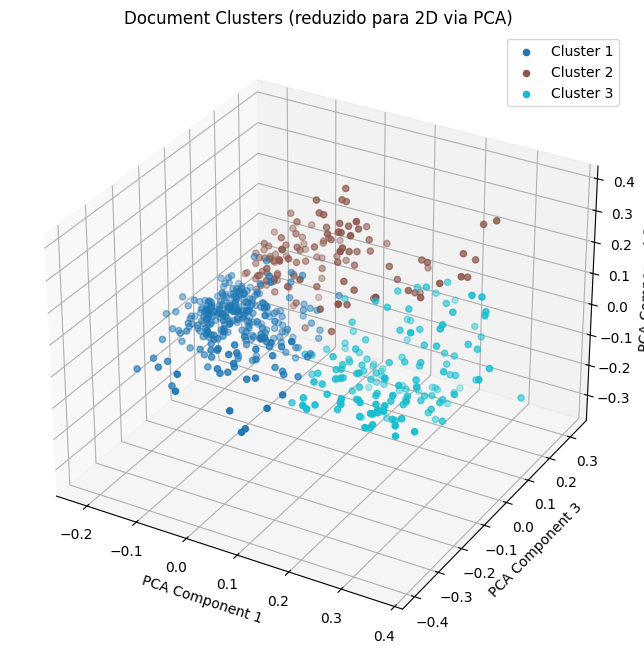

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Reduzindo a dimensionalidade para 2 componentes principais
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Plotando os clusters em um gráfico 2D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

# Usando um mapa de cores com base no número de clusters
cmap = plt.get_cmap('tab10')  # Escolha um mapa de cores (ex.: 'tab10', 'viridis', 'plasma', etc.)
colors = [cmap(i) for i in np.linspace(0, 1, num_clusters)]

# Plotando os pontos e colorindo de acordo com os clusters
for i in range(num_clusters):
    points = reduced_features[df_documents['Cluster'] == i]
    ax.scatter(points[:, 0], points[:, 1],points[:, 2], c=[colors[i]], label=f'Cluster {i+1}')

ax.set_title('Document Clusters (reduzido para 2D via PCA)')
ax.set_xlabel('PCA Component 1')
ax.set_zlabel('PCA Component 2')
ax.set_ylabel('PCA Component 3')
ax.legend()
plt.show()



### Interpretação dos pontos no gráfico:

- Cada ponto no gráfico corresponde a um documento. A cor do ponto indica o **cluster** ao qual o documento pertence, com base no algoritmo K-Means.
- Documentos que estão mais próximos entre si no gráfico são mais similares, enquanto documentos mais distantes uns dos outros possuem características mais distintas.
- A separação visual entre clusters reflete o grau de similaridade entre os documentos: documentos em um mesmo cluster compartilham termos importantes, enquanto documentos de clusters diferentes possuem menor sobreposição de termos.



**Concluindo:**

A Análise de Componentes Principais (PCA) é uma técnica de redução de dimensionalidade amplamente utilizada em aprendizado de máquina e estatística. O principal objetivo do PCA é transformar um conjunto de dados de alta dimensionalidade em um espaço de menor dimensão, preservando a maior quantidade possível de variabilidade dos dados originais.

Ao aplicar PCA a um conjunto de vetores TF-IDF, você obtém uma representação mais compacta dos documentos. Vamos imaginar que você tenha documentos representados por vetores TF-IDF em um espaço de 1000 dimensões (1000 palavras diferentes no corpus). Após aplicar o PCA, você pode reduzir isso para 2 dimensões, o que permite visualizar os documentos em um gráfico de dispersão. Os documentos que estão mais próximos uns dos outros no gráfico têm vetores TF-IDF semelhantes, sugerindo que eles compartilham muitos termos importantes.